In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
S1 = pd.read_csv("Datos_corriente_FG3_s2_Curva1.csv", names=['value1','value2','value3','value4','value5'], header=0, delimiter=',')
S2 = pd.read_csv("Datos_corriente_FG3_s2_Curva2.csv", names=['value1','value2','value3','value4','value5'], header=0, delimiter=',')
S3 = pd.read_csv("Datos_corriente_FG3_s2_Curva3.csv", names=['value1','value2','value3','value4','value5'], header=0, delimiter=',')
S4 = pd.read_csv("Datos_corriente_FG3_s4_Curva1.csv", names=['value1','value2','value3','value4','value5'], header=0, delimiter=',')
S5 = pd.read_csv("Datos_corriente_FG3_s1_Curva1.csv", names=['value1','value2','value3','value4','value5'], header=0, delimiter=',')

#Sens = pd.concat([S1, S2, S3, S4, S5]).sort_index()

Sens = pd.concat([S1, S2, S3]).sort_index()

In [20]:
N=np.size(Sens.value2)
Ni=0
Nf=N

Sens= Sens.iloc[Ni:Nf]


In [21]:
Inten = Sens.value3.drop_duplicates()
Y=Inten.iloc[0]


In [22]:
from sympy import *

init_printing(pretty_print=true)

from sympy.vector import CoordSys3D
N = CoordSys3D('N')

import scipy.integrate as integ
import mpmath as mp

import numpy as np

#CALCULO DE CAMPO MAGNETICO GENERADO POR UNA HELICE, PRESENTACION DEL MODELO 
#Radio helice
R= var('R')

#Espaciamiento
a= var('a')

#Variables
phi = Symbol('phi') #Unico parametro de la curva

#Curva parametrizada,  helice
c = R*cos(phi)*N.i+R*sin(phi)*N.j+(a/(2*pi))*phi*N.k

#vector tangente diferencial
l= c.diff(phi)

#Posicion de medicion
x=var('x');y=var('y');z=var('z');
r= x*N.i+y*N.j+z*N.k

#Corriente
I = var('I')

#Permeabilidad del vacio
mu = var('\mu_{0}')

#Diferencia entre posicion de medicion y posicion fuente
eta = r - c

#CON VARIABLES DEFINIDAS PARA RESOLVER EL MODELO
#R= 0.045 #m
#Diametro Interno
D=0.0433
R1=D/2

#Diametro externo
D2=0.0595
R2=D2/2

R=(R1+R2)/2
print(R)
#Espaciamiento
a = 0.002 #m

#Curva parametrizada,  helice
c = R*cos(phi)*N.i+R*sin(phi)*N.j+(a/(2*pi))*phi*N.k

#vector tangente diferencial
l= c.diff(phi)

#COrriente
#I = 500*10**(-6) #Ampere

#Permeabilidad del vacio
mu = 4*pi*10**(-7)

#Medicion
r= x*N.i+y*N.j+z*N.k

#Diferencia entre posicion de medicion y posicion fuente
eta = r - c

0.0257


In [23]:
#FUNCION PARA CALCULAR EL CAMPO CREADO POR EL HELICOIDE EN PUNTOS X,Y,Z

def CampoB(x,y,z):
                #PUNTO de Medicion
        r= x*N.i+y*N.j+z*N.k
        
        #Diferencia entre posicion de medicion y posicion fuente
        eta = r - c
        
        INT=((l.cross(eta))/((sqrt(eta.dot(eta)))**3))
        
        INTx= INT.dot(N.i)
        INTy= INT.dot(N.j)
        INTz= INT.dot(N.k)
        
        intX= lambdify (phi, INTx, 'mpmath')
        intY= lambdify (phi, INTy, 'mpmath')
        intZ= lambdify (phi, INTz, 'mpmath')

        Ix=sympify(mp.quad(intX,[-200*mp.pi,200*mp.pi]))
        Iy=sympify(mp.quad(intY,[-200*mp.pi,200*mp.pi]))
        Iz=sympify(mp.quad(intZ,[-200*mp.pi,200*mp.pi]))
        
        #Permeabilidad del vacio
        mu = 4*pi*10**(-7)

        K=(mu*I)/(4*pi).evalf()

        Bx=K*Ix.evalf()
        Bxer=K*Ix
        
        By=K*Iy.evalf()
        Byer=K*Iy

        Bz=K*Iz.evalf()
        #Bzer=K*Iz
        #B=Bx*N.i+By*N.j+Bz*N.k
        B=[Bx.evalf(),By.evalf(),Bz.evalf()]
        return B
    
def intX(phi,x,y,z):
     return (-0.0005*(y - 0.045*sin(phi))/pi + 0.045*(-0.0005*phi/pi + z)*cos(phi))/((x - 0.045*cos(phi))**2 + (y - 0.045*sin(phi))**2 + (-0.0005*phi/pi + z)**2)**(3/2)
    
def intY(phi,x,y,z):
     return (0.0005*(x - 0.045*cos(phi))/pi + 0.045*(-0.0005*phi/pi + z)*sin(phi))/((x - 0.045*cos(phi))**2 + (y - 0.045*sin(phi))**2 + (-0.0005*phi/pi + z)**2)**(3/2)
    
def intZ(phi,x,y,z):
     return (-0.045*(x - 0.045*cos(phi))*cos(phi) - 0.045*(y - 0.045*sin(phi))*sin(phi))/((x - 0.045*cos(phi))**2 + (y - 0.045*sin(phi))**2 + (-0.0005*phi/pi + z)**2)**(3/2)

def Berr(x,y,z):
    K=(mu*I)/(4*pi).evalf()
    Ix=integ.quad(intX,-50*pi,50*pi,args=(x,y,z))

    Iy=integ.quad(intY,-50*pi,50*pi,args=(x,y,z))

    Iz=integ.quad(intZ,-50*pi,50*pi,args=(x,y,z))

    Bx=K*Ix[0]
    Bxer=K*Ix[1]

    By=K*Iy[0]
    Byer=K*Iy[1]

    Bz=K*Iz[0]
    Bzer=K*Iz[1]
    
    B=Bx*N.i+By*N.j+Bz*N.k
    
    Ber=Bxer*N.i+Byer*N.j+Bzer*N.k
    return B,Ber


In [24]:
Datos = pd.DataFrame(columns=['MediaINT','DVINT','CoefVInt','MediaEXT', 'DVEXT','CoefVExt', 'Corriente','Campo_z','Campo_y'])


for i in range(0,np.size(Inten)):
    I=float(Inten.iloc[i])
    #print(I)
    B=CampoB(0,0,0)
    X=Sens.loc[Sens['value3'] == Inten.iloc[i]]
    MeanINT= np.mean(X.value2/1e6)
    DVINT=np.std(X.value2/1e6)
    MeanEXT= np.mean(X.value1/1e6)
    DVEXT=np.std(X.value1/1e6)
    CoefVInt = DVINT/MeanINT
    CoefVExt = DVEXT/MeanEXT
    Datos.loc[i] = [MeanINT] + [DVINT] + [CoefVInt] + [MeanEXT] + [DVEXT] + [CoefVExt] + [I] + [B[2]*1e9] + [B[1]*1e9]


In [25]:
Datos=Datos.sort_values(by='Corriente', ascending=True)
print(Datos)

     MediaINT     DVINT  CoefVInt   MediaEXT     DVEXT  CoefVExt  Corriente  \
39   8.226792  0.003091  0.000376  18.828600  0.001152  0.000061   -0.08090   
54   8.276976  0.000484  0.000058  18.662510  0.001806  0.000097   -0.08050   
40   8.252537  0.001333  0.000162  18.985599  0.002836  0.000149   -0.07960   
33   8.582459  0.002565  0.000299  18.748599  0.026584  0.001418   -0.07010   
53   8.905339  0.106844  0.011998  18.620668  0.015003  0.000806   -0.06240   
34   8.921034  0.011114  0.001246  18.768938  0.009985  0.000532   -0.06130   
28   8.847575  0.002396  0.000271  18.433589  0.006189  0.000336   -0.06080   
52   9.481376  0.002849  0.000301  18.541109  0.003103  0.000167   -0.05220   
29   9.288007  0.002696  0.000290  18.333061  0.005457  0.000298   -0.05020   
51  10.491749  0.247376  0.023578  18.394630  0.055814  0.003034   -0.04110   
4    9.949984  0.049531  0.004978  18.467139  0.229474  0.012426   -0.04060   
18  11.048904  0.004864  0.000440  18.618277  0.0054

0.0514758595595649
-0.0504164290359419
0.101892288595507


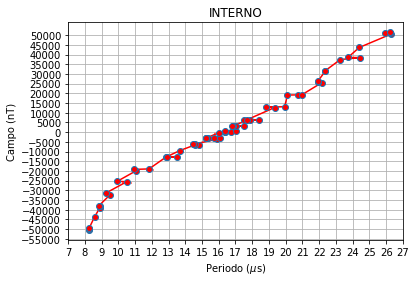

In [26]:
X_min=np.min(Datos.MediaINT)
X_max=np.max(Datos.MediaINT)
Y_min=np.min(Datos.Campo_z)
Y_max=np.max(Datos.Campo_z)

curm= plt.plot(Datos.MediaINT,Datos.Campo_z, 'r-')
#cur= plt.plot(X1, Y1, "-", c='green', lw=0.4)
e=plt.errorbar(Datos.MediaINT, Datos.Campo_z,  xerr=Datos.DVINT, linestyle='none', ecolor='r' ,marker='o', mfc='red', capsize=0.5, lw=0.3)

print(Y_max/1e6)
print(Y_min/1e6)
print((Y_max-Y_min)/1e6)

plt.ylabel('Campo (nT)')
plt.xlabel(r'Periodo ($\mu$s)')
plt.xlim(X_min,X_max)
plt.xticks(np.arange(7, 28, 1)) 
plt.yticks(np.arange(-55000, 55000, 5000)) 
#plt.xlim(14,17)
#plt.ylim(Y_min,Y_max)
plt.title('INTERNO')
plt.grid()
#plt.show(1)
plt.savefig("resultados_calibracion_FG1.png", dpi=1000)

1.91230564137931e-05
1.784626513333333e-05
1.2767912804597722e-06


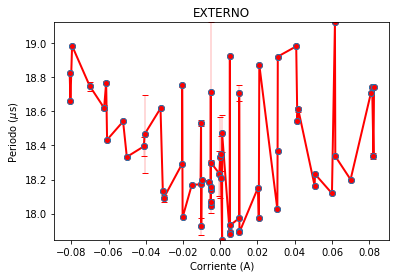

In [27]:
ig= plt.plot(2)

Y_min=np.min(Datos.MediaEXT)
Y_max=np.max(Datos.MediaEXT)

curm= plt.plot(Datos.Corriente, Datos.MediaEXT,marker='o', c='red', lw=2)
#cur= plt.plot(X1, Y1, "-", c='green', lw=0.4)
e=plt.errorbar(Datos.Corriente, Datos.MediaEXT, yerr=Datos.DVEXT, linestyle='none', ecolor='r' ,marker='o', mfc='red', capsize=3, lw=0.3)

print(Y_max/1e6)
print(Y_min/1e6)
print((Y_max-Y_min)/1e6)
plt.xlabel('Corriente (A)')
plt.ylabel(r'Periodo ($\mu$s)')
#plt.xlim(Ni,Nf)
plt.ylim(Y_min,Y_max)
plt.title('EXTERNO')

plt.savefig("resultados_ajuste_ruido_sin_blindaje.png", dpi=500)

16.345668760601903
16.345668760601903


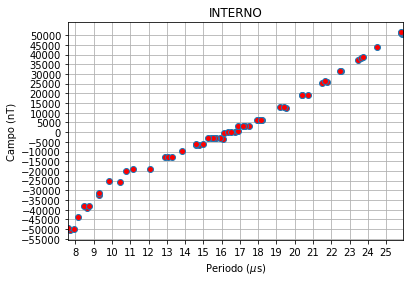

In [28]:
X01= Datos.loc[Datos['Corriente'] == 0].MediaINT
X02=  Datos.loc[Datos['Corriente'] == 0].MediaEXT

Xb= -X01.iloc[0]+X02.iloc[0]
print(float(X01))

Xc= Xb + Datos.MediaINT - Datos.MediaEXT + float(X01)

X01er= Datos.loc[Datos['Corriente'] == 0].DVINT
X02er=  Datos.loc[Datos['Corriente'] == 0].DVEXT

Xber= -X01er.iloc[0]+X02er.iloc[0]
print(float(X01))

Xcer= Xber + Datos.DVINT - Datos.DVEXT + float(X01er)

Y_min=np.min(Xc)
Y_max=np.max(Xc)

#curm= plt.plot(Xc,Datos.Campo_z, marker='o', c='green',markersize=1, lw=0)
e=plt.errorbar(Xc,Datos.Campo_z, yerr=Xcer, linestyle='none', ecolor='r' ,marker='o', mfc='red', capsize=0.5, lw=0.3)

plt.ylabel('Campo (nT)')
plt.xlabel(r'Periodo ($\mu$s)')
plt.xticks(np.arange(7, 28, 1))
plt.yticks(np.arange(-55000, 55000, 5000))

plt.xlim(Y_min,Y_max)
#plt.xlim(15,18)
#plt.ylim(-10000,10000)
#plt.ylim(np.min(Datos.Campo_z),np.max(Datos.Campo_z))
plt.grid()
plt.title('INTERNO')

plt.savefig("resultados_curvas_calibracion_Sensor_2.png", dpi=500)

In [29]:
R_Peruzzi= pd.DataFrame(columns=['Periodo','Campo_z'])

Cam = Datos.Campo_z

for i in range(0,np.size(Cam)):
    Campo=Cam.iloc[i]
    
    Per=Xc.iloc[i]
    
    R_Peruzzi.loc[i] = [Per] + [Campo]

R_Peruzzi= R_Peruzzi.sort_values(by=['Periodo'], ascending=True)

In [30]:
C1=R_Peruzzi.iloc[0:12]
#CC1=R_Inicial.iloc[0:12]

print(C1,sep='\n')

C2=R_Peruzzi.iloc[12:np.size(R_Peruzzi.Periodo)]
#CC2=R_Inicial.iloc[12:np.size(R_Peruzzi.Periodo)]

print(C2,sep='\n')

      Periodo            Campo_z
2    7.597970  -49606.2762825832
0    7.729224  -50416.4290359419
1    7.945497  -50167.1512656777
3    8.164892  -43685.9292388075
5    8.483128  -38201.8182929943
4    8.615704  -38887.3321612210
6    8.745018  -37890.2210801640
7    9.271299  -32530.7490194829
8    9.285978  -31284.3601681617
10   9.813876  -25301.6936818201
9   10.428151  -25613.2908946503
11  10.761659  -20004.5410637050
      Periodo            Campo_z
12  11.164773  -19225.5480316293
13  12.077309  -18970.0383171084
14  12.903508  -12787.9496145554
15  13.068439  -12763.0218375289
16  13.269736  -12607.2232311138
17  13.831114  -9541.10665686367
21  14.609832  -6263.10397788895
19  14.613478  -6431.36647281732
18  14.740394  -6605.86091200228
20  14.991330  -6369.04703025126
28  15.274920  -3103.50823978975
26  15.420884  -3140.89990532939
27  15.523126  -3134.66796107278
25  15.620792  -3153.36379384260
24  15.668627  -3178.29157086902
23  15.909784  -3215.68323640866
22  16.066

Line funcion coefficients:
[ 1.32055023e+02 -3.53919515e+04  1.99550340e+00]
Covariance of coefficients:
[[ 1.11097412e-03 -5.60200019e-02 -2.41700107e-06]
 [-5.60200019e-02  2.92467857e+00  1.21284009e-04]
 [-2.41700107e-06  1.21284009e-04  5.26272945e-09]]
[3.33312783e-02 1.71016916e+00 7.25446721e-05]


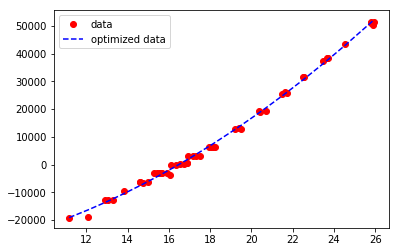

In [31]:
from scipy.optimize import curve_fit 

y=C2.Campo_z

x = C2.Periodo

def test(x, a, b, c): 
    return a*x**c+b
#def test(x, a, b): 
#    return a*x+b
  
param, param_cov = curve_fit(test, x, y,absolute_sigma=True) 
  
print("Line funcion coefficients:") 
print(param) 
print("Covariance of coefficients:") 
print(param_cov) 
  
ans = (param[0]*x**param[2]+param[1]) 
#ans = (param[0]*x+param[1]) 

perr = np.sqrt(np.diag(param_cov))
print(perr)

M_coef_Up= [param[0]+perr[0],param[1]+perr[1],param[2]+perr[2]]
M_coef_Do= [param[0]-perr[0],param[1]-perr[1],param[2]-perr[2]]

#M_coef_Up= [param[0]+perr[0],param[1]+perr[1]]
#M_coef_Do= [param[0]-perr[0],param[1]-perr[1]]


#MUp= M_coef_Up[0]*x+M_coef_Up[1]
#MDo= M_coef_Do[0]*x+M_coef_Do[1]

#MUp= M_coef_Up[0]*x**M_coef_Up[2]+M_coef_Up[1]
#MDo= M_coef_Do[0]*x**M_coef_Do[2]+M_coef_Do[1]

#DeltaH=(MUp-MDo)/2

plt.plot(x, y, 'o', color ='red', label ="data") 
plt.plot(x, ans, '--', color ='blue', label ="optimized data") 
#plt.plot(x, MUp, '-', color ='red', label ="Model error +") 
#plt.plot(x, MDo, '-', color ='green', label ="Modelo error -") 

plt.legend() 
plt.show() 

In [32]:
residuals = y- test(x, param[0],param[1],param[2])
#residuals = y- test(x, param[0],param[1])

ss_res = np.sum(residuals**2)

ss_tot = np.sum((y-np.mean(y))**2)
R_2 = 1 - (ss_res / ss_tot)

print(R_2)

0.997447156123650


Line funcion coefficients:
[  -1490.36884798   37009.87850266 -246883.16466758]
Covariance of coefficients:
[[ 1.00757977e-01 -1.84226851e+00  8.31692311e+00]
 [-1.84226851e+00  3.37695460e+01 -1.52827175e+02]
 [ 8.31692311e+00 -1.52827175e+02  6.93356357e+02]]
[ 0.31742397  5.81115703 26.33166074]


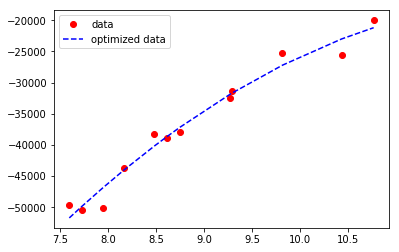

In [188]:
from scipy.optimize import curve_fit 

y=C1.Campo_z

x = C1.Periodo

def test(x, a, b, c): 
    return a*x**2+b*x+c
  
#def test(x, a, b): 
#    return a*x+b
  
param, param_cov = curve_fit(test, x, y,absolute_sigma=True) 
  
print("Line funcion coefficients:") 
print(param) 
print("Covariance of coefficients:") 
print(param_cov) 
  
ans = (param[0]*x**2+param[1]*x+param[2]) 
#ans = (param[0]*x+param[1]) 

perr = np.sqrt(np.diag(param_cov))
print(perr)

plt.plot(x, y, 'o', color ='red', label ="data") 
plt.plot(x, ans, '--', color ='blue', label ="optimized data") 
#plt.plot(x, MUp, '-', color ='red', label ="Model error +") 
#plt.plot(x, MDo, '-', color ='green', label ="Modelo error -") 

plt.legend() 
plt.show() 

In [189]:
residuals = y- test(x, param[0],param[1],param[2])
#residuals = y- test(x, param[0],param[1])

ss_res = np.sum(residuals**2)

ss_tot = np.sum((y-np.mean(y))**2)
R_2 = 1 - (ss_res / ss_tot)

print(R_2)

0.972285037719037
